# Name(s): Rushitha Reddy Palgutta, Pratheeka Thummala,Tony Li
# GROUP 3 - Classifying Loan approval status using Machine Learning Algorithms
# Date: 10/31/2021
# Class: Knowledge Discovery in Databases

# LOAN PREDICTION APPLICATION

Import all the required libraries

Seaborn is used for data visualization

Pandas is used for data manipulation

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
%matplotlib inline
import seaborn as sns
warnings.filterwarnings('ignore')

Import the dataset(.csv file) and creating dataframe

Two csv files are used train.csv and test.csv. So we create 2dataframes training dataset and testing dataset

In [23]:
trainingDataset = pd.read_csv("train.csv")
testingDataset = pd.read_csv("test.csv")
print (trainingDataset.head())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

Printing number of records and columns are present in both training and testing data

Training data contains 614 records and 13 columns

Testing data contains 367 records and 12 columns 

In [24]:
print ("TRAINING DATA DETAILS")
print ("Total  number of records present in the dataset -", trainingDataset.shape[0])
print ("Total  number of columns present in the dataset -", trainingDataset.shape[1])

print ("\n TESTING DATA DETAILS")
print ("Total  number of records present in the dataset -", testingDataset.shape[0])
print ("Total  number of columns present in the dataset -", testingDataset.shape[1])

TRAINING DATA DETAILS
Total  number of records present in the dataset - 614
Total  number of columns present in the dataset - 13

 TESTING DATA DETAILS
Total  number of records present in the dataset - 367
Total  number of columns present in the dataset - 12


Merging both training and testing data into by using concat function of pandas library and storing it in a variable called combined.

After combining the datasets we can see that combined dataset contains 981(614+367) records and 13 columns.

Displaying the combine colums using (.columns). 

In [25]:
combined = pd.concat([trainingDataset, testingDataset],ignore_index=True, sort=False)
print (combined.shape)
print (combined.columns)
y = trainingDataset['Loan_Status']

(981, 13)
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


Printing datatype of each column using (dataframe.dtypes)

In [26]:
print ("Following are the columns present in the dataset - ", combined.columns)
print (combined.dtypes)

Following are the columns present in the dataset -  Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


All columns with categorical data are separated to find various entries in each column

Printing different entries in each column using (.values)

After extracting different entries we find if there are any missing values in the respective column using (.isnull()) and print the count of missing values

In [27]:
print ("TOTAL NUMBER OF RECORDS IN THE COMBINED DATASET  - ", combined.shape[0])
print ("\n")
categoricalColNames = combined.iloc[:,1:].select_dtypes(include=['object'])
requiredCategoricalVariables = list(categoricalColNames.columns.values)
for x in requiredCategoricalVariables:
    print ("Number of value counts for -", x)
    print (combined[x].value_counts())
    print ('Number of Missing values: %d'% sum(combined[x].isnull()))
    print ("\n")
    
numericalColNames = combined.iloc[:,1:].select_dtypes(include=['int64','float64'])
requiredCategoricalVariables = list(numericalColNames.columns.values)
for x in requiredCategoricalVariables:
    print ('Number of missing values in ', x ,': %d'% sum(combined[x].isnull()))


TOTAL NUMBER OF RECORDS IN THE COMBINED DATASET  -  981


Number of value counts for - Gender
Male      775
Female    182
Name: Gender, dtype: int64
Number of Missing values: 24


Number of value counts for - Married
Yes    631
No     347
Name: Married, dtype: int64
Number of Missing values: 3


Number of value counts for - Dependents
0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64
Number of Missing values: 25


Number of value counts for - Education
Graduate        763
Not Graduate    218
Name: Education, dtype: int64
Number of Missing values: 0


Number of value counts for - Self_Employed
No     807
Yes    119
Name: Self_Employed, dtype: int64
Number of Missing values: 55


Number of value counts for - Property_Area
Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64
Number of Missing values: 0


Number of value counts for - Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64
Number of Missing values: 367


Number of m

We can even use dataframe.info to find the number of non-null values which also gives number of missing values and the datatypes of each column 

In the output we see that 7 columns are having missing values.

In [28]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


fillna() function is used to fill the missing values . We can fill the missing values using mean, median, mode, standard deviation, variance or any other values.

All the 7 columns having missing values are replaced with mean(), mean(), 'NO', 'NA', 'NA', '0', 0 respectively

In [29]:
### FILLING THE MISSING VALUES IN THE REQUIRED COLUMNS
combined['LoanAmount'].fillna(combined['LoanAmount'].mean(), inplace=True)
combined['Loan_Amount_Term'].fillna(combined['Loan_Amount_Term'].mean(), inplace=True)
combined['Self_Employed'].fillna('No',inplace=True)
combined['Married'].fillna('NA',inplace=True)
combined['Gender'].fillna('NA',inplace=True)
combined['Dependents'].fillna('0',inplace=True)
combined['Credit_History'].fillna(0,inplace=True)

After filling the missing values we check if we have any other null values using the same (.isnull()) function. 

We see that there are no null values 

In [30]:
requiredColumns = list(combined.columns.values)
print ("Checking if there are any missing values in the dataset - ")
for col in requiredColumns:
    print ("column name  -", col)
    print ('Final #missing: %d'% sum(combined[col].isnull()))
    print ("\n")

Checking if there are any missing values in the dataset - 
column name  - Loan_ID
Final #missing: 0


column name  - Gender
Final #missing: 0


column name  - Married
Final #missing: 0


column name  - Dependents
Final #missing: 0


column name  - Education
Final #missing: 0


column name  - Self_Employed
Final #missing: 0


column name  - ApplicantIncome
Final #missing: 0


column name  - CoapplicantIncome
Final #missing: 0


column name  - LoanAmount
Final #missing: 0


column name  - Loan_Amount_Term
Final #missing: 0


column name  - Credit_History
Final #missing: 0


column name  - Property_Area
Final #missing: 0


column name  - Loan_Status
Final #missing: 367




Since there are no missing values in the dataset we now proceed with the training dataset to train the data and further apply visualization on data.

## Training Dataset Information

In [31]:
trainingSet = trainingDataset
trainingSet.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


.describe() is used to find the count, mean, minimum, standard deviation, quartiles and maximum of each column.

There seems to be some outliers for the Applicant Income, Co applicant income and Loan Amount.

We also see that about 84% applicants have a credit history.


In [32]:
trainingSet.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Because the Credit History field has a mean of 0.84 and the entries are either a positive or negative value (1 for having a credit history or 0 for not)  the distribution of the numerical variables, particularly the applicants income and the loan amount, would be fascinating to investigate. 

We will use seaborn for visualization in order to accomplish this.

### Distribution Analysis

We plot a histogram for applicants income and pass the number of bins.

We find that there are some outliers 

<AxesSubplot:>

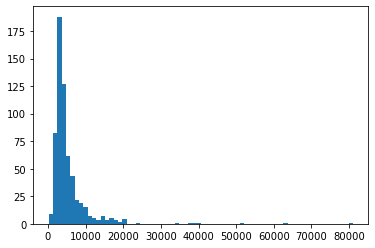

In [33]:
trainingSet['ApplicantIncome'].hist(bins=70,grid=False)

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

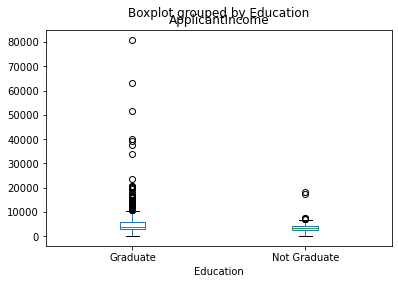

In [34]:
trainingSet.boxplot(column = 'ApplicantIncome', grid =False, by = 'Education')

We cannot plot Loan Amount directly since it has missing values. 

One method is to use the dropna function to remove the missing values rows before plotting.

Other alternative is to fill the missing value using .fillna()

<AxesSubplot:>

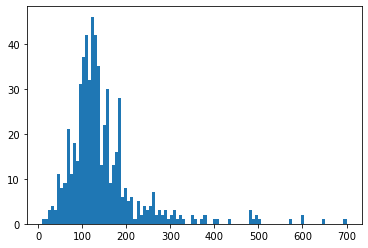

In [35]:
trainingSet['LoanAmount'].hist(bins=100,grid = False)

### Categorical Value Analysis

We plot a bar graph for credit history and see that there are more people with credit history around 500.

<AxesSubplot:>

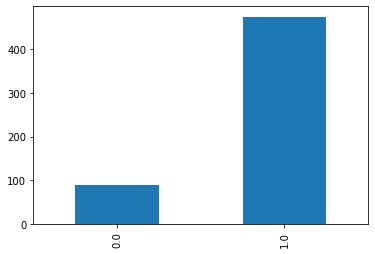

In [36]:
temp = trainingSet['Credit_History'].value_counts(ascending = True)
temp.plot(kind = 'bar')

We check if there are any missing values in the data and we can see there are missing values in the training dataset.

In [37]:
 trainingSet.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### DATA PREPROCESSING
Filling the missing values with mean() or mode() or 'No'

In [38]:
trainingSet['LoanAmount'].fillna(trainingSet['LoanAmount'].mean(),inplace=True)
trainingSet['Self_Employed'].fillna('No',inplace=True)
trainingSet['Gender'].fillna(trainingSet['Gender'].mode()[0], inplace=True)
trainingSet['Married'].fillna(trainingSet['Married'].mode()[0], inplace=True)
trainingSet['Dependents'].fillna(trainingSet['Dependents'].mode()[0], inplace=True)
trainingSet['Loan_Amount_Term'].fillna(trainingSet['Loan_Amount_Term'].mode()[0], inplace=True)
trainingSet['Credit_History'].fillna(trainingSet['Credit_History'].mode()[0], inplace=True)
trainingSet.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


After filling the missing values with respective values or functions we check if there are any other missing values in the dataset.

In [39]:
trainingSet.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Plotting a heat map helps us find how are columns related to each other.

From the below heatmap we see that LoanAmount and ApplicantIncome are more correlated(i.e., more than 50%) which tells us that LoanAmount is mostly dependent on applicants income. 

If ApplicantIncome is more then the applicant is eligible for more LoanAmount.

Other than ApplicantIncome, LoanAmount is more dependent on CoapplicantIncome (i.e., almost 20%).


Whereas CoaaplicantIncome and Credit_History are least related to each other.

ApplicantIncome is the significant factor in our data.

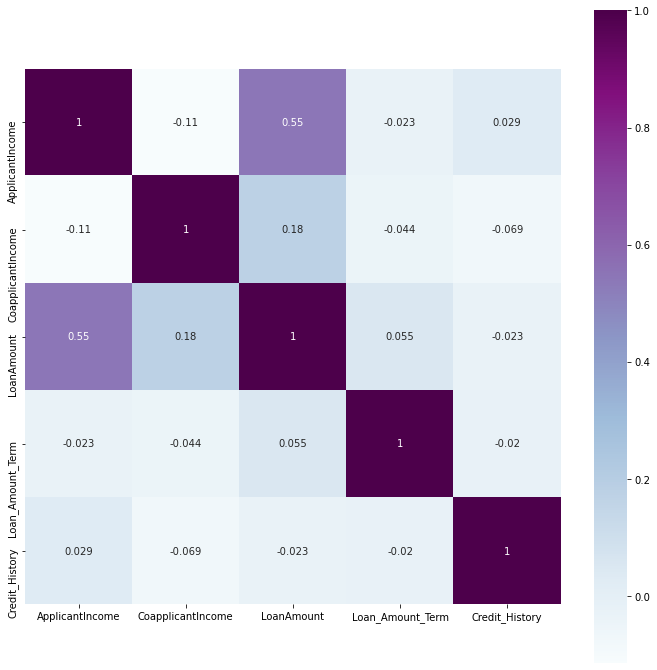

In [43]:
plt.figure(figsize=(12,12))
sns.heatmap(combined.iloc[:, 2:].corr(), annot=True, square=True, cmap='BuPu')
plt.show()

We can see that those with more education have a greater income by charting their education level against their income.

The distributions are relatively similar, but we can observe that graduates have more outliers, implying that the wealthy are likely to be well educated.

We now plot what columns are mostly required for our data

From the plot we conclude that ApplicantIncome is more important for determining the Loan_Status

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

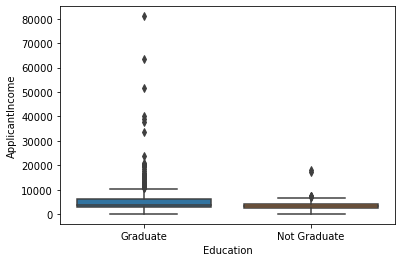

In [44]:
sns.boxplot(x='Education',y='ApplicantIncome',data=trainingDataset)

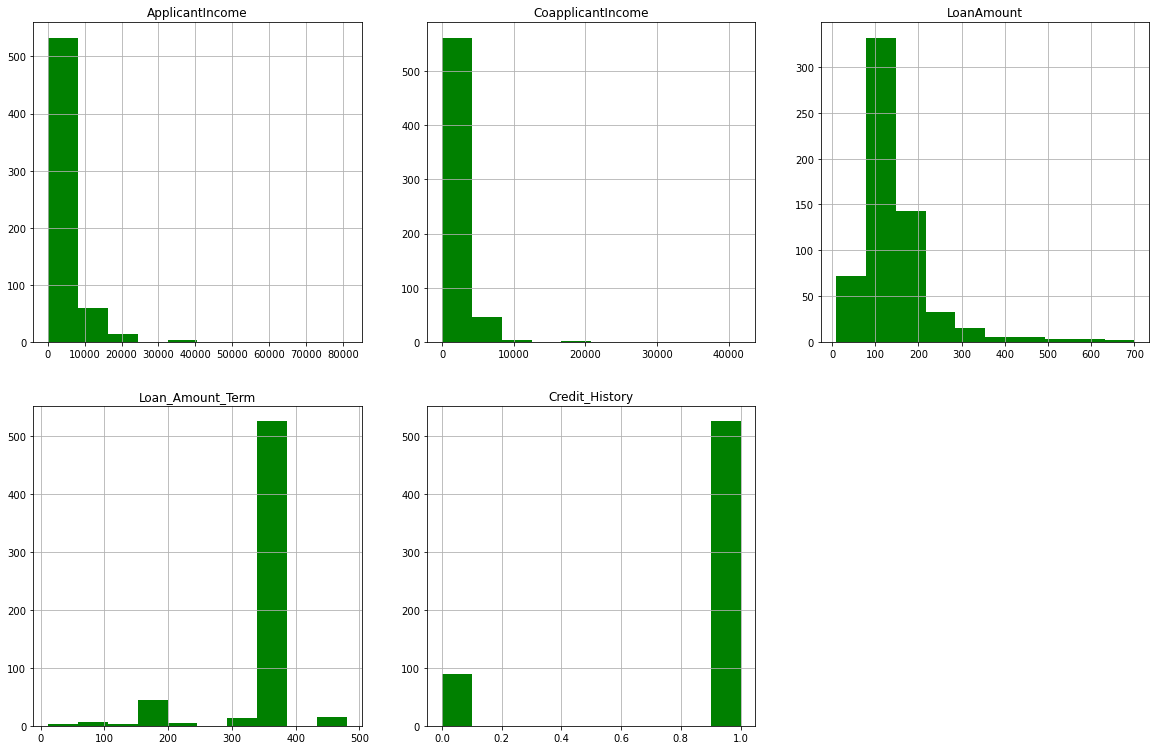

In [45]:
plt.figure(figsize=(20,20))
temp = trainingDataset.iloc[:,2:].select_dtypes(include=['int64','float64'])
requiredColumns = list(temp.columns.values)
counter = 1
for col in requiredColumns:
    plt.subplot(3, 3, counter)
    trainingDataset[col].hist(color = 'green')
    plt.title(col)
    counter = counter + 1
   

### Let's understand the distributions of ApplicantIncome and LoanAmount. Also Lets understand the categorical variables in more detail

Another intriguing variable is credit history, to see how it influences Loan Status we may convert it to binary and calculate its mean for each credit history value. A high loan success rate is indicated by a value close to 1.

We see that people with credit history are having high chance(not 100%) of loan approval compared to people who are having no credit history

<AxesSubplot:xlabel='Credit_History'>

<Figure size 720x720 with 0 Axes>

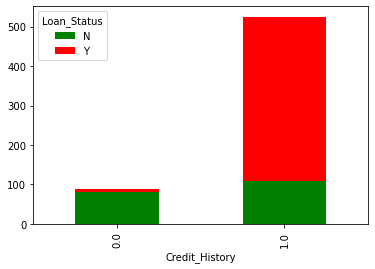

In [46]:
plt.figure(figsize=(10,10))
temp3 = pd.crosstab(trainingDataset['Credit_History'], trainingDataset['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['green','red'], grid=False)

In [47]:
nrow_train = trainingDataset.shape[0]
X_train = combined[:nrow_train]
X_test = combined[nrow_train:]
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for i in var_mod:
    X_train[i] = le.fit_transform(X_train[i])
    X_test[i] = le.fit_transform(X_test[i])
print ("CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS")

CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS


<AxesSubplot:>

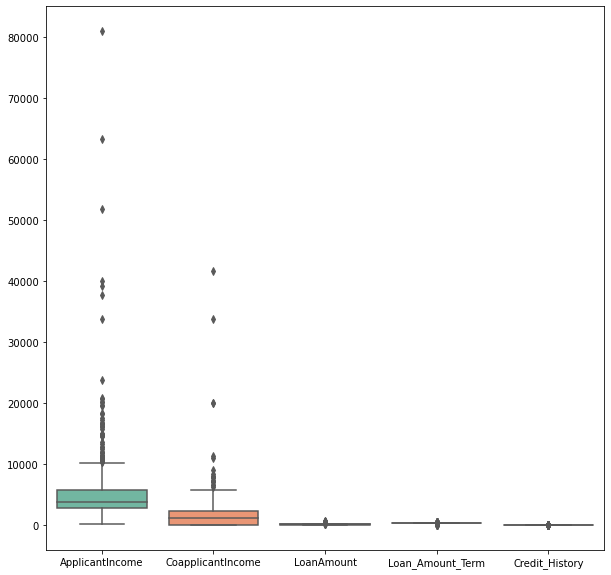

In [48]:
temp = trainingDataset.iloc[:,2:].select_dtypes(include=['int64','float64'])
requiredColumns = list(temp.columns.values)
plt.figure(figsize=(10,10))
sns.boxplot(data=X_train[requiredColumns], palette="Set2")

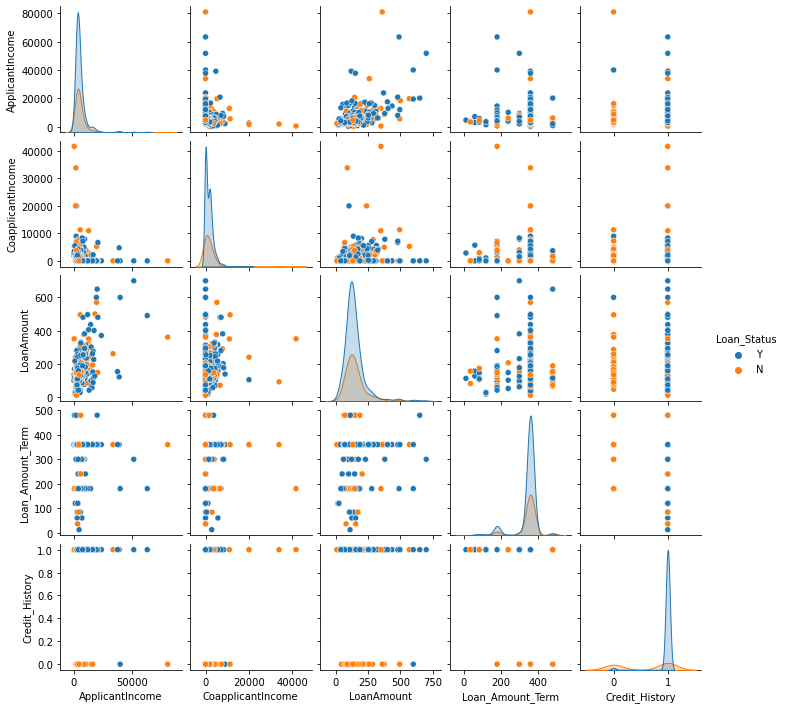

In [49]:
sns.pairplot(trainingDataset[trainingDataset.columns.values], hue='Loan_Status', diag_kind='kde', height=2);

The box plot show the outliers in the data. 
As you can see columns name "APPLICANT INCOME" and "CO APPLICANT INCOME" have outliers

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split #For K-fold cross validation

from sklearn import metrics
X = X_train.iloc[:, 2:11].values
y = X_train.iloc[:, 12].values
#X = X.reshape(X.shape[0],1)
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.20, random_state=0)

LR_model = LogisticRegression(solver='sag')
LR_model.fit(X_tr,y_tr)
#Make predictions on training set:
predictions = LR_model.predict(X_te)

#Print accuracy
accuracy = metrics.accuracy_score(predictions,y_te)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
print("\n Classification report for classifier %s:\n%s\n"
      % (LR_model, metrics.classification_report(y_te, predictions)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_te, predictions))

count = 0
print ("TOTAL NUMBER OF TESTING RECORD - ",X_te.shape[0])
for x in range(len(X_te)):
    if(y_te[x] == predictions[x]):
        count = count + 1
print ("NUMBER OF CORRECTLY PREDICTED OUTPUTS - ",count)
print("\n")
for x in range(0,5):
    if(y_te[x] == predictions[x]):
        print ("TESTING RECORD - ",X_te[x])
        print ("ACTUAL OUTPUT - ", y_te[x])
        print ("PREDICTED OUTPUT - ",predictions[x])
        print ("_________________________________")

Accuracy : 73.171%

 Classification report for classifier LogisticRegression(solver='sag'):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.73      1.00      0.85        90

    accuracy                           0.73       123
   macro avg       0.37      0.50      0.42       123
weighted avg       0.54      0.73      0.62       123


Confusion matrix:
[[ 0 33]
 [ 0 90]]
TOTAL NUMBER OF TESTING RECORD -  123
NUMBER OF CORRECTLY PREDICTED OUTPUTS -  90


TESTING RECORD -  [1.000e+00 0.000e+00 0.000e+00 1.000e+00 7.085e+03 0.000e+00 8.400e+01
 3.600e+02 1.000e+00]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [2.000e+00 0.000e+00 0.000e+00 0.000e+00 6.133e+03 3.906e+03 3.240e+02
 3.600e+02 1.000e+00]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [2.000e+00 2.000e+00 0.000e+00 0.000e+00 2.708e+03 1.167e+03 9.700e+0

In [51]:
temp = trainingDataset.iloc[:,2:11]
requiredColumns = list(temp.columns.values)
print (requiredColumns)
FinalData = list(zip(X_te, y_te, predictions))
print (FinalData[0])
my_submission = pd.DataFrame( X_te, columns=[requiredColumns])
my_submission['Actual_Loan_Status'] = y_te
my_submission['Predicted_Loan_Status'] = predictions
my_submission.head()
my_submission.to_csv('LoanPredictionSubmissions.csv', index=False)


['Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 7.085e+03, 0.000e+00,
       8.400e+01, 3.600e+02, 1.000e+00]), 1, 1)


In [52]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split #For K-fold cross validation

from sklearn import metrics

model = LogisticRegression(solver='sag')
X = X_train.iloc[:, 10:11].values
y = X_train.iloc[:, 12].values
#X = X.reshape(X.shape[0],1)
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.25,random_state=0)

model.fit(X_tr,y_tr)
#Make predictions on training set:
predictions = model.predict(X_te)

#Print accuracy
accuracy = metrics.accuracy_score(predictions,y_te)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
print("\n Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(y_te, predictions)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_te, predictions))

count = 0
print ("TOTAL NUMBER OF TESTING RECORD - ",X_te.shape[0])
for x in range(len(X_te)):
    if(y_te[x] == predictions[x]):
        count = count + 1
print ("NUMBER OF CORRECTLY PREDICTED OUTPUTS - ",count)
print("\n")
for x in range(0,5):
    if(y_te[x] == predictions[x]):
        print ("TESTING RECORD - ",X_te[x])
        print ("ACTUAL OUTPUT - ", y_te[x])
        print ("PREDICTED OUTPUT - ",predictions[x])
        print ("_________________________________")

Accuracy : 79.221%

 Classification report for classifier LogisticRegression(solver='sag'):
              precision    recall  f1-score   support

           0       0.67      0.51      0.58        43
           1       0.83      0.90      0.86       111

    accuracy                           0.79       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.78      0.79      0.78       154


Confusion matrix:
[[ 22  21]
 [ 11 100]]
TOTAL NUMBER OF TESTING RECORD -  154
NUMBER OF CORRECTLY PREDICTED OUTPUTS -  122


TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________


FOLLOWING IS THE COUNTPLOT DISPLAYING THE PREDICTIONS - 


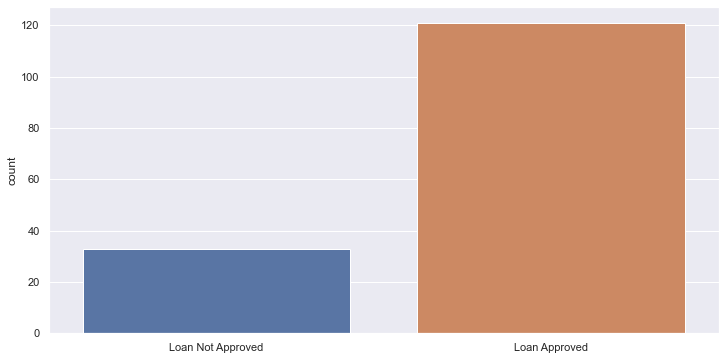

In [53]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
ax = sns.countplot(x=predictions)
ax.set_xticklabels(["Loan Not Approved","Loan Approved"])
print ("FOLLOWING IS THE COUNTPLOT DISPLAYING THE PREDICTIONS - ")

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_tr,y_tr)
predictions = rf_model.predict(X_te)

#Print accuracy
accuracy = metrics.accuracy_score(predictions,y_te)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
print("\n Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(y_te, predictions)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_te, predictions))

count = 0
print ("TOTAL NUMBER OF TESTING RECORD - ",X_te.shape[0])
for x in range(len(X_te)):
    if(y_te[x] == predictions[x]):
        count = count + 1
print ("NUMBER OF CORRECTLY PREDICTED OUTPUTS - ",count)
print("\n")
for x in range(0,5):
    if(y_te[x] == predictions[x]):
        print ("TESTING RECORD - ",X_te[x])
        print ("ACTUAL OUTPUT - ", y_te[x])
        print ("PREDICTED OUTPUT - ",predictions[x])
        print ("_________________________________")

Accuracy : 79.221%

 Classification report for classifier LogisticRegression(solver='sag'):
              precision    recall  f1-score   support

           0       0.67      0.51      0.58        43
           1       0.83      0.90      0.86       111

    accuracy                           0.79       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.78      0.79      0.78       154


Confusion matrix:
[[ 22  21]
 [ 11 100]]
TOTAL NUMBER OF TESTING RECORD -  154
NUMBER OF CORRECTLY PREDICTED OUTPUTS -  122


TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________


FOLLOWING IS THE COUNTPLOT DISPLAYING THE PREDICTIONS - 


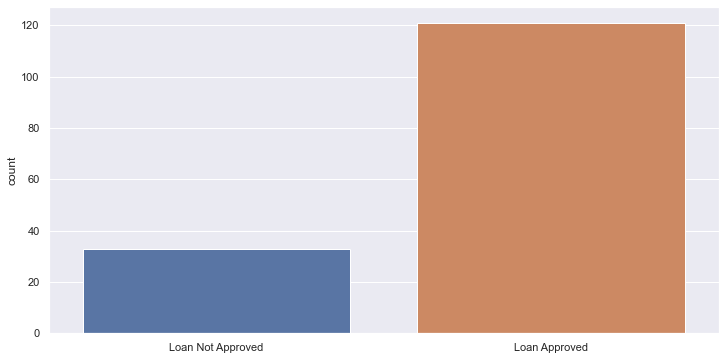

In [55]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
ax = sns.countplot(x=predictions)
ax.set_xticklabels(["Loan Not Approved","Loan Approved"])
print ("FOLLOWING IS THE COUNTPLOT DISPLAYING THE PREDICTIONS - ")

In [56]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_tr,y_tr)
predictions = clf.predict(X_te)

#Print accuracy
accuracy = metrics.accuracy_score(predictions,y_te)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
print("\n Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_te, predictions)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_te, predictions))

count = 0
print ("TOTAL NUMBER OF TESTING RECORD - ",X_te.shape[0])
for x in range(len(X_te)):
    if(y_te[x] == predictions[x]):
        count = count + 1
print ("NUMBER OF CORRECTLY PREDICTED OUTPUTS - ",count)
print("\n")
for x in range(0,5):
    if(y_te[x] == predictions[x]):
        print ("TESTING RECORD - ",X_te[x])
        print ("ACTUAL OUTPUT - ", y_te[x])
        print ("PREDICTED OUTPUT - ",predictions[x])
        print ("_________________________________")

Accuracy : 79.221%

 Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.67      0.51      0.58        43
           1       0.83      0.90      0.86       111

    accuracy                           0.79       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.78      0.79      0.78       154


Confusion matrix:
[[ 22  21]
 [ 11 100]]
TOTAL NUMBER OF TESTING RECORD -  154
NUMBER OF CORRECTLY PREDICTED OUTPUTS -  122


TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________


In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_tr,y_tr)
predictions = knn.predict(X_te)

#Print accuracy
accuracy = metrics.accuracy_score(predictions,y_te)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
print("\n Classification report for classifier %s:\n%s\n"
      % (knn, metrics.classification_report(y_te, predictions)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_te, predictions))

count = 0
print ("TOTAL NUMBER OF TESTING RECORD - ",X_te.shape[0])
for x in range(len(X_te)):
    if(y_te[x] == predictions[x]):
        count = count + 1
print ("NUMBER OF CORRECTLY PREDICTED OUTPUTS - ",count)
print("\n")
for x in range(0,5):
    if(y_te[x] == predictions[x]):
        print ("TESTING RECORD - ",X_te[x])
        print ("ACTUAL OUTPUT - ", y_te[x])
        print ("PREDICTED OUTPUT - ",predictions[x])
        print ("_________________________________")

Accuracy : 79.221%

 Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

           0       0.67      0.51      0.58        43
           1       0.83      0.90      0.86       111

    accuracy                           0.79       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.78      0.79      0.78       154


Confusion matrix:
[[ 22  21]
 [ 11 100]]
TOTAL NUMBER OF TESTING RECORD -  154
NUMBER OF CORRECTLY PREDICTED OUTPUTS -  122


TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________
TESTING RECORD -  [1.]
ACTUAL OUTPUT -  1
PREDICTED OUTPUT -  1
_________________________________


In [58]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    trainingSet[i] = le.fit_transform(trainingSet[i])
trainingSet.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [59]:
X = trainingSet[['Credit_History','Gender','Married','Education']]
y = trainingSet['Loan_Status']

In [60]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)
predictions = model.predict(X)

In [61]:
from sklearn.metrics import accuracy_score
print(accuracy_score(predictions,y))

0.8094462540716613


In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
predictions = model.predict(X)

In [63]:
pred = model.predict(X)
print(pred)

[ 0.73782803  0.82841883  0.82841883  0.77602864  0.73782803  0.82841883
  0.77602864  0.12223556  0.82841883  0.82841883  0.82841883  0.82841883
  0.82841883  0.73782803  0.82841883  0.73782803  0.68543784  0.05412042
  0.77602864  0.82841883  0.06984536  0.82841883  0.06984536  0.06984536
  0.82841883  0.82841883  0.82841883  0.77602864  0.68543784  0.76030369
  0.82841883  0.73782803  0.73782803  0.82841883  0.73782803  0.82841883
  0.12223556  0.8508945   0.73782803  0.68543784  0.73782803  0.73782803
  0.82841883  0.82841883  0.77602864  0.76030369  0.82841883  0.82841883
  0.14471122  0.76030369  0.79850431  0.76030369  0.76030369  0.82841883
  0.14471122  0.82841883  0.82841883  0.82841883  0.82841883  0.77602864
  0.82841883  0.82841883  0.06984536  0.12223556  0.05412042  0.82841883
 -0.02074544  0.82841883  0.77602864  0.05412042  0.82841883  0.77602864
  0.73782803  0.06984536  0.82841883  0.73782803  0.73782803  0.82841883
  0.12223556  0.77602864  0.76030369  0.82841883  0

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.29375743869224613
